In [170]:
import pandas as pd
df = pd.read_excel(r"C:\Users\Alekhya\OneDrive\Desktop\titanic.xlsx")  # adjust path

print("Data Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())


Data Shape: (887, 8)

Data Types:
 Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

Missing Values:
 Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


In [171]:
print(df.describe())
print(df.describe(include="object"))


         Survived      Pclass         Age  Siblings/Spouses Aboard  \
count  887.000000  887.000000  887.000000               887.000000   
mean     0.385569    2.305524   29.471443                 0.525366   
std      0.487004    0.836662   14.121908                 1.104669   
min      0.000000    1.000000    0.420000                 0.000000   
25%      0.000000    2.000000   20.250000                 0.000000   
50%      0.000000    3.000000   28.000000                 0.000000   
75%      1.000000    3.000000   38.000000                 1.000000   
max      1.000000    3.000000   80.000000                 8.000000   

       Parents/Children Aboard       Fare  
count               887.000000  887.00000  
mean                  0.383315   32.30542  
std                   0.807466   49.78204  
min                   0.000000    0.00000  
25%                   0.000000    7.92500  
50%                   0.000000   14.45420  
75%                   0.000000   31.13750  
max              

In [172]:
df["Age"].fillna(df["Age"].median(), inplace=True)


C:\Users\Alekhya\AppData\Local\Temp\ipykernel_15212\1567474574.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


In [173]:
import seaborn as sns
import matplotlib.pyplot as plt


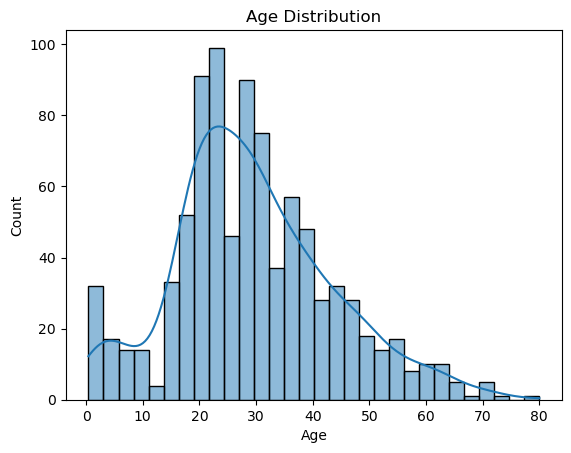

In [174]:
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


<Axes: xlabel='Pclass', ylabel='Fare'>

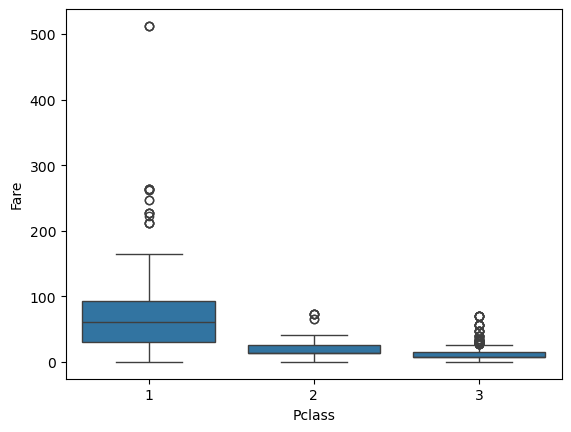

In [175]:
sns.boxplot(x="Pclass", y="Fare", data=df)


<Axes: xlabel='Sex', ylabel='count'>

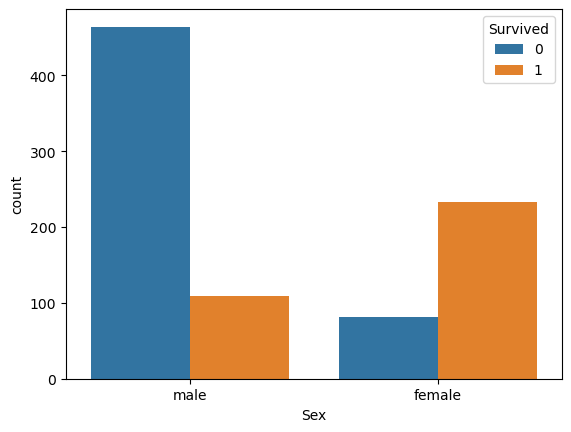

In [176]:
sns.countplot(x="Sex", hue="Survived", data=df)


<Axes: >

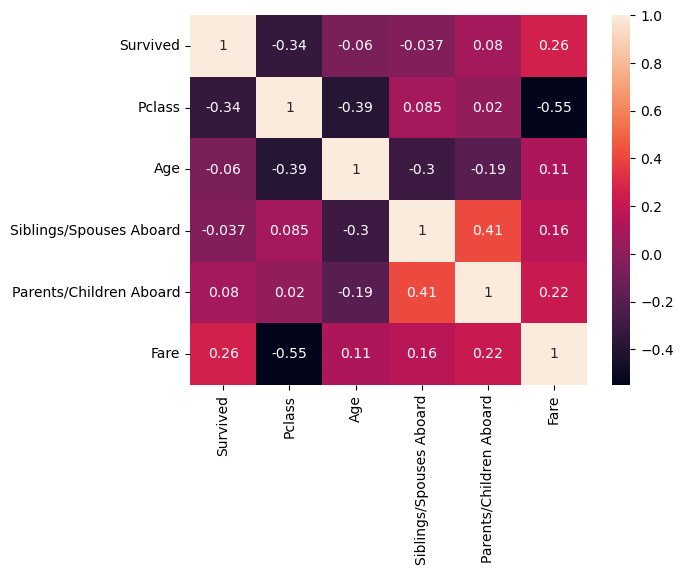

In [177]:
sns.heatmap(df.corr(numeric_only=True), annot=True)


In [178]:
pd.crosstab(df["Pclass"], df["Survived"], normalize="index")*100


Survived,0,1
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.564682,24.435318


In [179]:
import numpy as np


In [180]:
from scipy import stats
import numpy as np   # <-- add this line

z_scores = np.abs(stats.zscore(df["Fare"]))
outliers = df[z_scores > 3]
print(len(outliers))


20


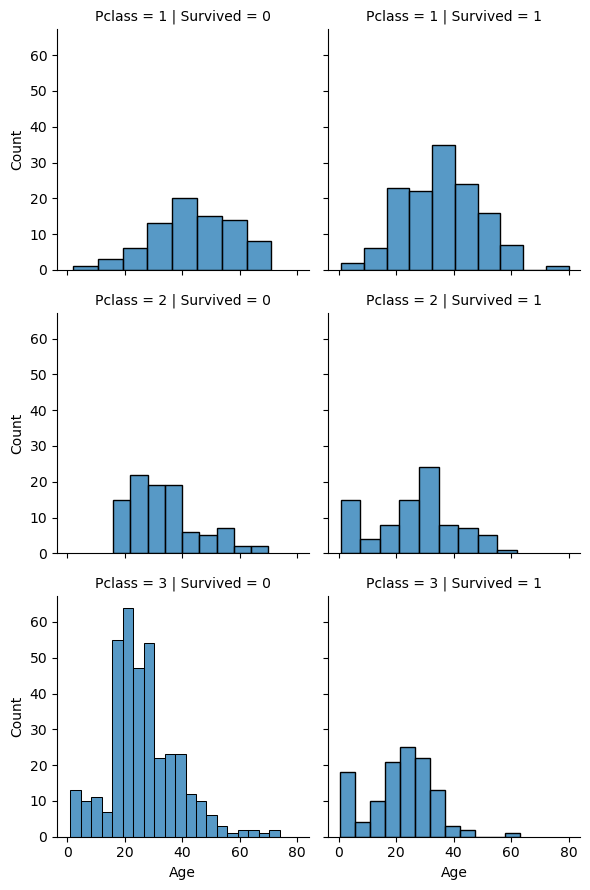

In [181]:
g = sns.FacetGrid(df, col="Survived", row="Pclass")
g.map(sns.histplot, "Age")


In [182]:
print(df.columns)


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')


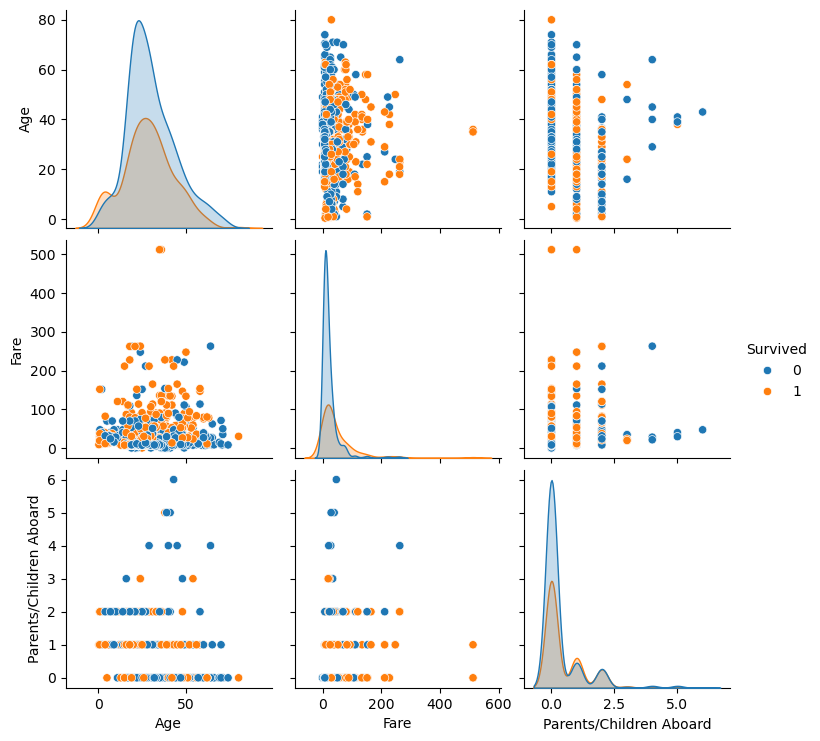

In [183]:
sns.pairplot(df[["Age","Fare","Parents/Children Aboard","Survived"]], hue="Survived")


In [184]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df["Fare"]))
outliers = df[z_scores > 3]
print("Number of fare outliers:", len(outliers))
print(outliers[["Name","Pclass","Fare","Survived"]].sort_values("Fare", ascending=False).head())


Number of fare outliers: 20
                                  Name  Pclass      Fare  Survived
257                    Miss. Anna Ward       1  512.3292         1
733              Mr. Gustave J Lesurer       1  512.3292         1
676  Mr. Thomas Drake Martinez Cardeza       1  512.3292         1
27       Mr. Charles Alexander Fortune       1  263.0000         0
339      Miss. Alice Elizabeth Fortune       1  263.0000         1


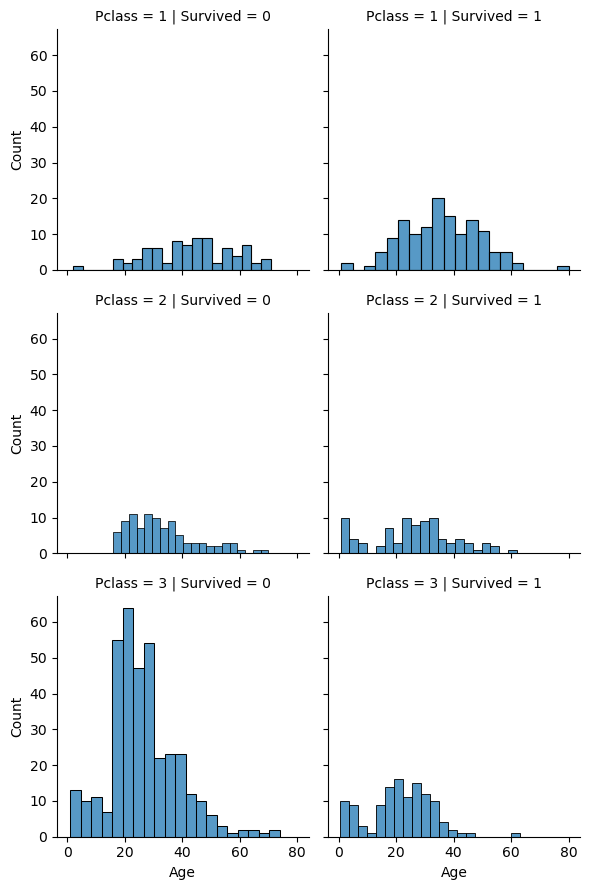

In [185]:
g = sns.FacetGrid(df, col="Survived", row="Pclass", height=3)
g.map(sns.histplot, "Age", bins=20)
plt.show()
